In [1]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

plt.style.use('seaborn')
%matplotlib inline

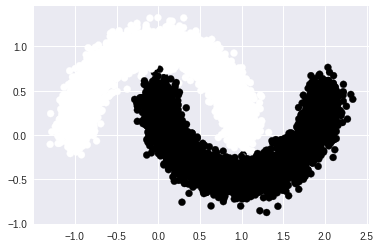

In [2]:
X,y = datasets.make_moons(n_samples=10000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [30]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out = self.sigmoid(self.l1(x))
        return out   


In [31]:
model = NeuralNetwork()

In [5]:
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)

In [6]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [7]:
#store all the loss values
losses = []

In [8]:
for epoch in tqdm(range(10000)):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    if not epoch%500: print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|          | 0/10000 [00:00<?, ?it/s]/home/joshhu/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([10000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
  1%|▏         | 126/10000 [00:00<00:15, 626.61it/s]

0 0.8865177631378174


  6%|▌         | 595/10000 [00:00<00:12, 740.10it/s]

500 0.25065547227859497


 11%|█         | 1079/10000 [00:01<00:12, 737.87it/s]

1000 0.25065556168556213


 17%|█▋        | 1654/10000 [00:02<00:11, 748.32it/s]

1500 0.25065556168556213


 21%|██        | 2062/10000 [00:02<00:10, 740.16it/s]

2000 0.25065556168556213


 26%|██▋       | 2627/10000 [00:03<00:09, 737.55it/s]

2500 0.25065556168556213


 31%|███       | 3079/10000 [00:04<00:09, 731.47it/s]

3000 0.25065556168556213


 36%|███▌      | 3623/10000 [00:04<00:08, 729.44it/s]

3500 0.25065556168556213


 41%|████      | 4105/10000 [00:05<00:08, 728.04it/s]

4000 0.25065556168556213


 46%|████▌     | 4569/10000 [00:06<00:07, 725.32it/s]

4500 0.25065556168556213


 51%|█████     | 5109/10000 [00:07<00:06, 726.15it/s]

5000 0.25065556168556213


 56%|█████▌    | 5589/10000 [00:07<00:06, 726.50it/s]

5500 0.25065556168556213


 61%|██████    | 6107/10000 [00:08<00:05, 722.16it/s]

6000 0.25065553188323975


 66%|██████▌   | 6591/10000 [00:09<00:04, 723.36it/s]

6500 0.25065553188323975


 71%|███████   | 7114/10000 [00:09<00:03, 721.77it/s]

7000 0.25065523386001587


 76%|███████▌  | 7566/10000 [00:10<00:03, 721.70it/s]

7500 0.25065523386001587


 81%|████████  | 8104/10000 [00:11<00:02, 719.02it/s]

8000 0.2506551146507263


 86%|████████▋ | 8645/10000 [00:12<00:01, 720.34it/s]

8500 0.25065580010414124


 91%|█████████ | 9079/10000 [00:12<00:01, 724.85it/s]

9000 0.25065580010414124


 96%|█████████▋| 9629/10000 [00:13<00:00, 722.60it/s]

9500 0.2506555914878845


100%|██████████| 10000/10000 [00:13<00:00, 720.75it/s]


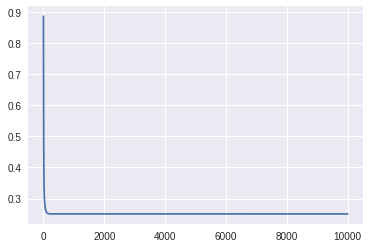

In [9]:
plt.plot(losses)

tensor([[0.9999]], grad_fn=<SigmoidBackward>)


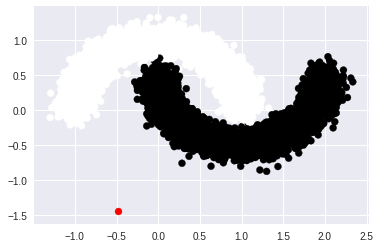

In [10]:
test = torch.randn(1,2, dtype=torch.float)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()